In [1]:
import os
from glob import glob

import numpy as np
import utils

from matplotlib import pyplot as plt

COLORS = utils.pascal_color_map()[1:]

/home/ythu/miniconda/envs/onevision_ta_2_pseudo_labeling/lib/python3.10/site-packages/scipy/__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.25.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Converting 5000 RGB samples to LAB color space...
Conversion to LAB complete.
Fitting KMeans with 128 clusters on 5000 samples...
KMeans fitting complete.


1. Load the data

In [2]:
# Preapre the data path
DATA_DIR = "/fsx-onevision/tym/sam3_and_data/data"
ANNOT_DIR = os.path.join(DATA_DIR, "annotation")

# Load the SACO/Veval annotation files
annot_file_list = glob(os.path.join(ANNOT_DIR, "*veval*.json"))
annot_dfs = utils.get_annot_dfs(file_list=annot_file_list)

  0%|          | 0/6 [00:00<?, ?it/s]

100%|██████████| 6/6 [00:03<00:00,  1.86it/s]


Show the annotation files being loaded

In [3]:
annot_dfs.keys()

dict_keys(['saco_veval_yt1b_val', 'saco_veval_smartglasses_test', 'saco_veval_yt1b_test', 'saco_veval_sav_val', 'saco_veval_smartglasses_val', 'saco_veval_sav_test'])

2. Examples of the data format

In [4]:
annot_dfs["saco_veval_sav_test"].keys()

dict_keys(['info', 'videos', 'annotations', 'categories', 'video_np_pairs'])

In [5]:
annot_dfs["saco_veval_sav_test"]["info"]

{'version': 'v1', 'date': '2025-09-24', 'description': 'SA-Co/VEval SA-V Test'}

In [6]:
annot_dfs["saco_veval_sav_test"]["videos"].head(3)

,id,video_name,file_names,height,width,length
0,0,sav_000208,"[sav_000208/00000.jpg, sav_000208/00004.jpg, s...",1280,720,146
1,1,sav_000425,"[sav_000425/00000.jpg, sav_000425/00004.jpg, s...",864,480,120
2,2,sav_000818,"[sav_000818/00000.jpg, sav_000818/00004.jpg, s...",864,480,117


In [7]:
annot_dfs["saco_veval_sav_test"]["annotations"].head(3)

,id,segmentations,bboxes,areas,iscrowd,video_id,height,width,category_id,noun_phrase
0,0,[{'counts': '`^`>b0[o04M4M10O100O100O1O2O0O101...,"[[464.0, 458.0, 18.0, 27.0], [466.0, 456.0, 20...","[384.0, 407.0, 392.0, 372.0, 384.0, 347.0, 388...",0,111,1024,576,49566,a gold watch
1,1,[{'counts': 'PRm1261mi0<H7M201O0000001O0000000...,"[[73.0, 614.0, 105.0, 38.0], [73.0, 614.0, 105...","[2608.0, 2679.0, 2704.0, 2728.0, 2715.0, 2698....",0,22,848,480,576,a tablet
2,2,[{'counts': 'oYP_11fQ12ZSO9Wg0JaXOg0Tg0\OnUOJg...,"[[1426.0, 317.0, 141.0, 209.0], [1432.0, 313.0...","[25950.0, 25876.0, 25880.0, 25880.0, 26040.0, ...",0,23,1080,1920,50891,a black and white camouflage tank top


In [8]:
annot_dfs["saco_veval_sav_test"]["categories"].head(3)

,id,name
0,1,a monkey
1,2,a horse
2,3,a fan


In [9]:
annot_dfs["saco_veval_sav_test"]["video_np_pairs"].head(3)

,id,video_id,category_id,noun_phrase,num_masklets
0,0,35,50912,an image of bottle,0
1,1,28,15691,the computer,0
2,2,66,48608,a gas station,0


3. Visualize the data

In [10]:
def get_a_non_none_seg(df):
    for i in range(len(df)):
        seg = df['segmentations'].iloc[i]
        if seg[0] is not None:
            return i
    raise ValueError("No non-none segmentation found")

Randomly selected video-np pair: video_id=116, noun_phrase=jeep
Reading annotations for frame 0
Reading annotations for frame 4
Reading annotations for frame 8
Reading annotations for frame 12
Reading annotations for frame 16


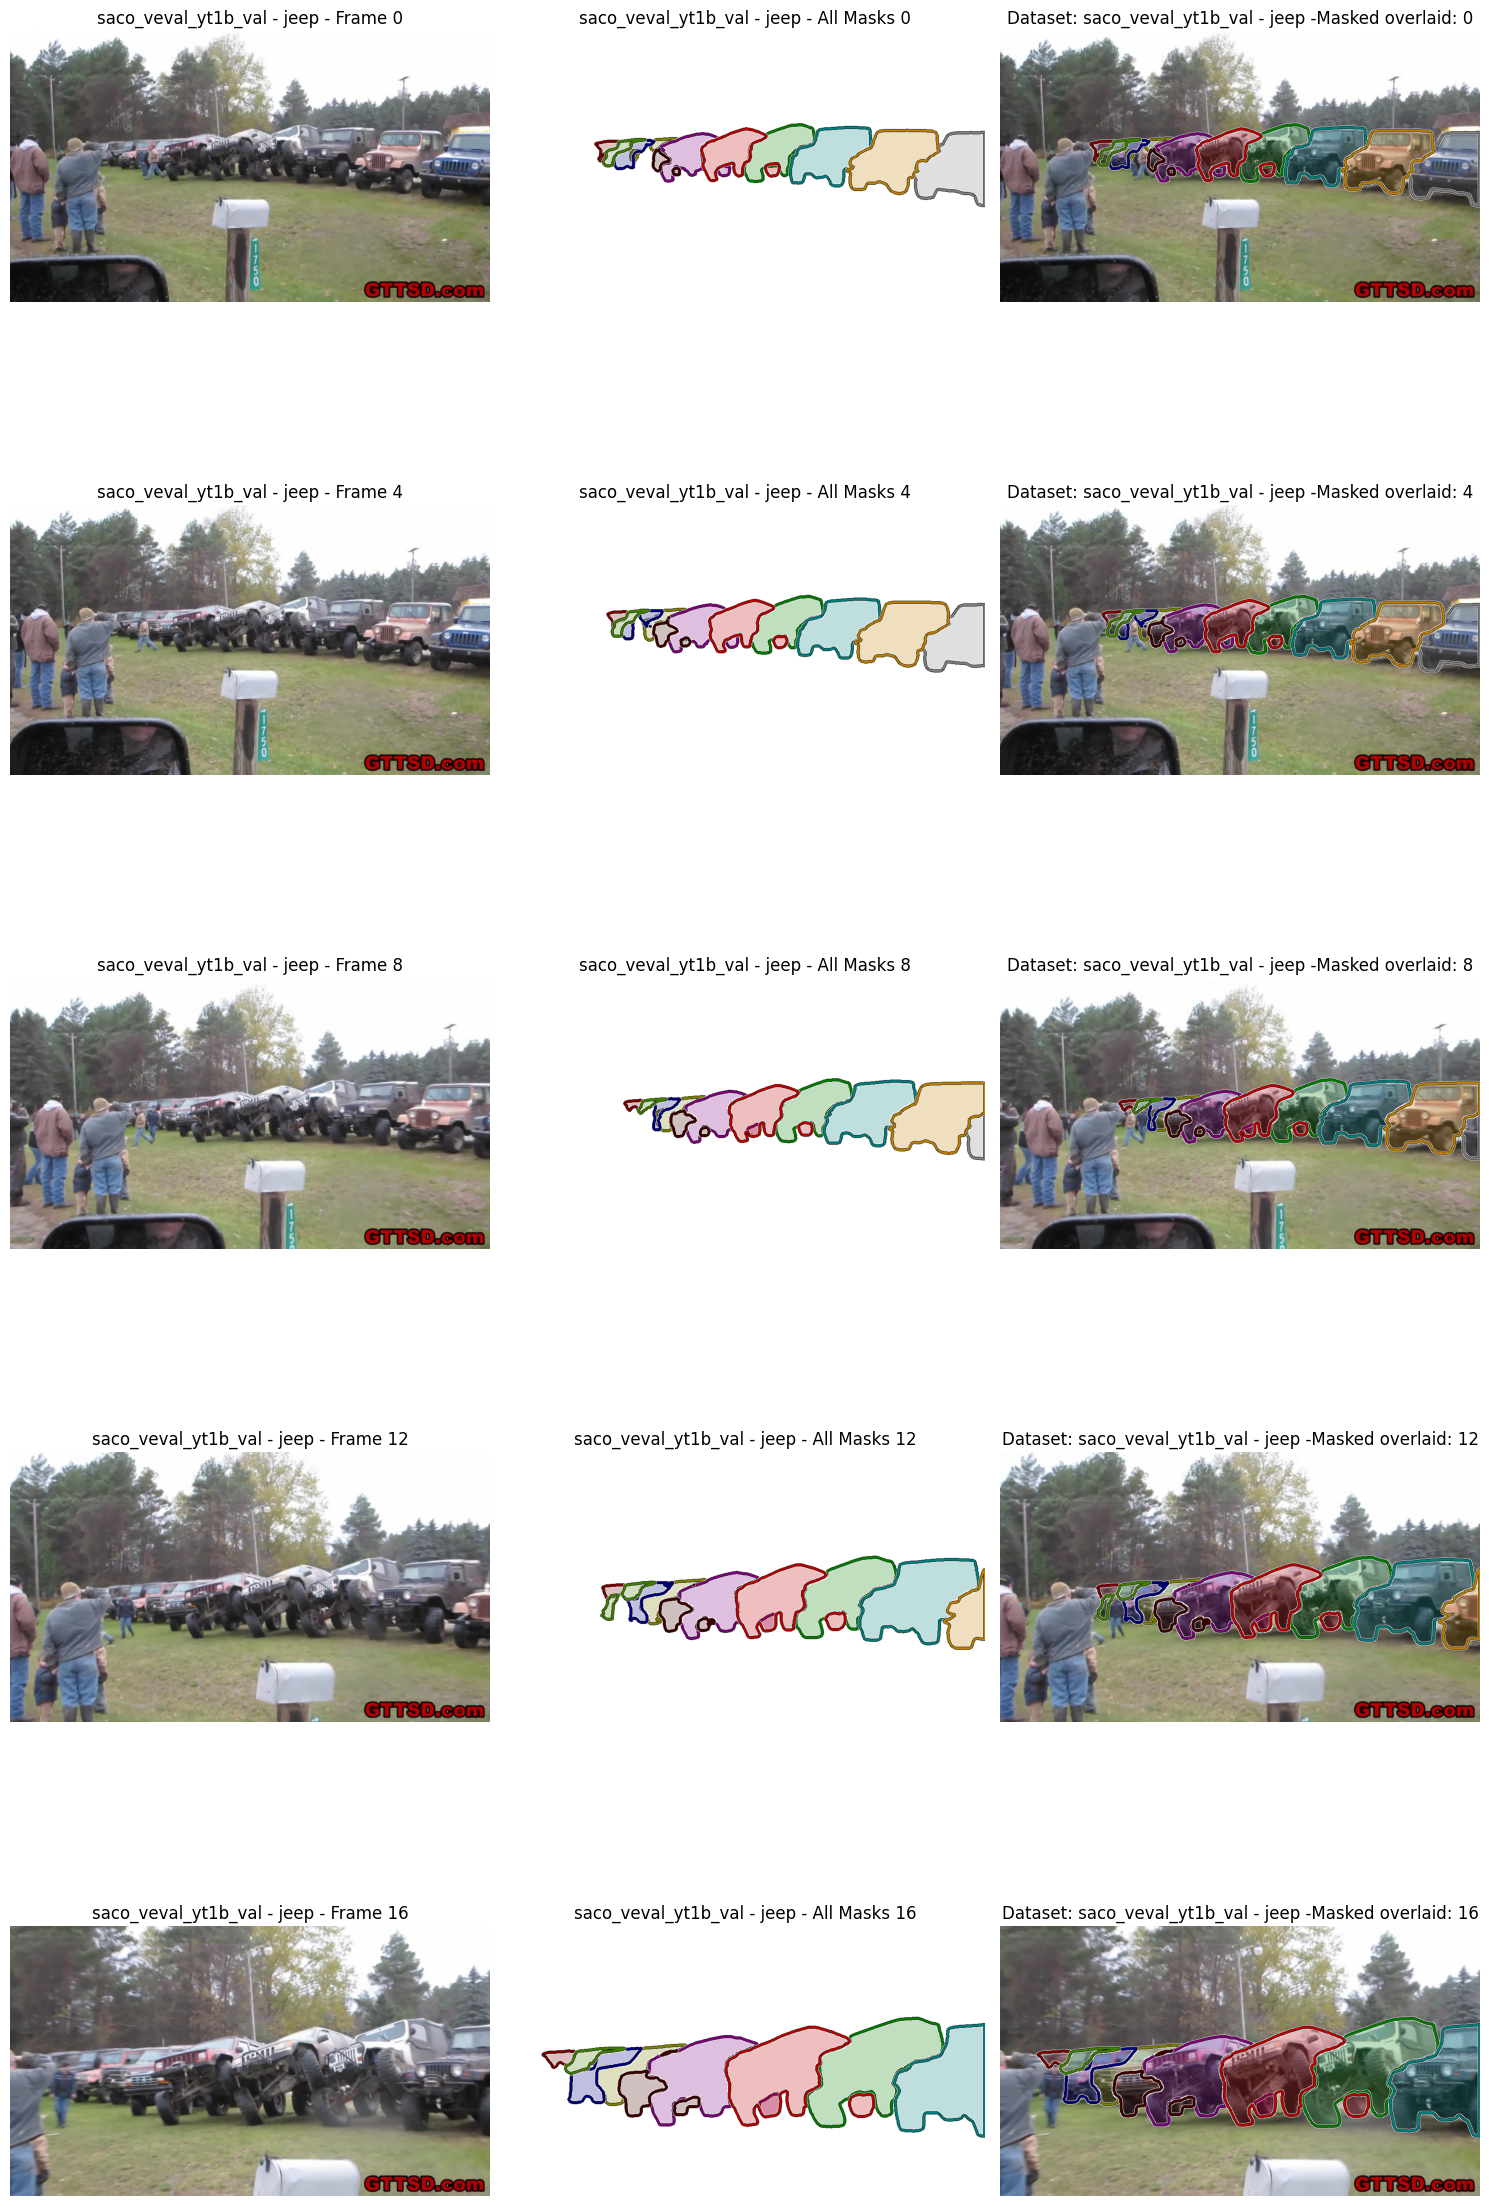

In [ ]:
# Select a target dataset
target_dataset_name = "saco_veval_yt1b_val"

# visualize a random positive video-np pair
df_pairs = annot_dfs[target_dataset_name]["video_np_pairs"]
df_positive_pairs = df_pairs[df_pairs.num_masklets > 0]
rand_idx = np.random.randint(len(df_positive_pairs))
pair_row = df_positive_pairs.iloc[rand_idx]
video_id = pair_row.video_id
noun_phrase = pair_row.noun_phrase
print(f"Randomly selected video-np pair: video_id={video_id}, noun_phrase={noun_phrase}")

def display_image_in_subplot(img, axes, row, col, title=""):
    axes[row, col].imshow(img)
    axes[row, col].set_title(title)
    axes[row, col].axis('off')

num_frames_to_show = 5  # Number of frames to show per dataset
every_n_frames = 4  # Interval between frames to show

fig, axes = plt.subplots(num_frames_to_show, 3, figsize=(15, 5 * num_frames_to_show))

for idx in range(0, num_frames_to_show):
    sampled_frame_idx = idx * every_n_frames
    print(f"Reading annotations for frame {sampled_frame_idx}")
    # Get the frame and the corresponding masks and noun phrases
    frame, annot_masks, annot_noun_phrases = utils.get_all_annotations_for_frame(
        annot_dfs[target_dataset_name], video_id=video_id, frame_idx=sampled_frame_idx, data_dir=DATA_DIR, dataset=target_dataset_name
    )
    # Filter masks and noun phrases by the selected noun phrase
    annot_masks = [m for m, np in zip(annot_masks, annot_noun_phrases) if np == noun_phrase]

    # Show the frame
    display_image_in_subplot(frame, axes, idx, 0, f"{target_dataset_name} - {noun_phrase} - Frame {sampled_frame_idx}")

    # Show the annotated masks
    if annot_masks is None:
        print(f"No masks found for video_id {video_id} at frame {sampled_frame_idx}")
    else:
        # Show all masks over a white background
        all_masks = utils.draw_masks_to_frame(
            frame=np.ones_like(frame)*255, masks=annot_masks, colors=COLORS[: len(annot_masks)]
        )
        display_image_in_subplot(all_masks, axes, idx, 1, f"{target_dataset_name} - {noun_phrase} - All Masks {sampled_frame_idx}")
        
        # Show masks overlaid on the frame
        masked_frame = utils.draw_masks_to_frame(
            frame=frame, masks=annot_masks, colors=COLORS[: len(annot_masks)]
        )
        display_image_in_subplot(masked_frame, axes, idx, 2, f"Dataset: {target_dataset_name} - {noun_phrase} -Masked overlaid: {sampled_frame_idx}")

plt.tight_layout()
plt.show()